# Question 1
#### 1.1) 
chosen values are: a=3, b=4, c=2.2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
a = 3
b = 4
c = 2.2
f = lambda x: a + b*x + c*(x**2)
x = np.linspace(-10,10)
fx = np.array(list(map(f,x)))

#### 1.2)

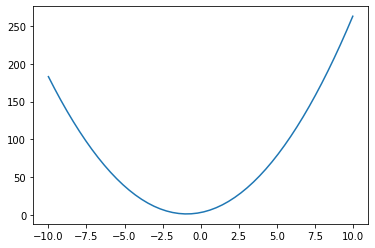

In [3]:
plt.plot(x,fx)
plt.show()

#### 1.3

In [4]:
grad_f = lambda x: b + 2*c*x

The minimum point for the function is -0.9090909

#### 1.4

In [5]:
def grad_update(grad,x,step):
    return x-step*grad(x)

#### 1.5)

In [6]:
x_k = 10
while grad_f(x_k) >= 1e-6:
    x_k = grad_update(grad_f,x_k,0.01)

In [7]:
x_k

-0.9090906912205658

The value we got is really close to the value we recieved from an anylitical solution. The difference between the results is from the size of the step which may not always converge exactly on the minimum. There are other factors which may contribute to the difference such as floating point precision, but that is not necessarily what happend here.

#### 1.6)

In [8]:
steps = [0.001,0.01, 0.1,1,10]
minimum = 1e10
total_xs = []
index = -1
for i,step in enumerate(steps):
    xs = []
    x_k = 7
    while abs(grad_f(x_k)) >= 1e-5:
        xs.append(x_k)
        x_k = grad_update(grad_f,x_k,step)
    xs.append(x_k)
    total_xs.append(xs)
    if len(xs) < minimum:
        minimum = len(xs)
        index  = i

In [9]:
len_of_xs = [len(x) for x in total_xs]
len_of_xs

[3417, 336, 27, 581, 191]

The step which produced the fastest convergence is $\eta$ = 0.1

#### 1.7)

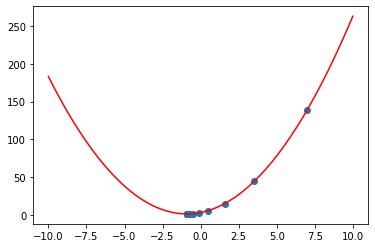

In [10]:
fs = list(map(f,total_xs[index]))
plt.plot(x,fx,'r')
plt.scatter(total_xs[index], fs)
plt.show()

# Question 2
### 2.4)

In [21]:
def svm_with_sgd(X,y,lam=0,epochs=1000,l_rate=0.01,sgd_type='practical'):
    import numpy as np
    np.random.seed(2)
    m, d = X.shape
    vector = np.random.uniform(size = d + 1)
    w,b = vector[:-1],vector[-1]
    if sgd_type == 'practical':
        while epochs>0:
            new_order = np.random.permutation(m)
            X_epoch = X[new_order]
            y_epoch = y[new_order]
            for x_i,y_i in zip(X_epoch,y_epoch):
                x_temp = x_i.copy()
                x_temp = np.append(x_temp,1)
                w_temp = w.copy()
                w_temp = np.append(w_temp,0)
                if 1 - y_i * (np.dot(x_i,w) + b) > 0:
                    sgd = - y_i * x_temp + 2 * lam * w_temp
                else:
                    sgd = 2 * lam * w_temp
                w = w - l_rate* sgd[:-1]
                b = b - l_rate* sgd[-1]
            epochs -= 1
        return w,b
    else:
        ws = [w]
        bs = [b]
        for i in range(m*epochs):
            index = np.random.randint(0,m)
            x_i,y_i = X[index],y[index]
            x_temp = x_i.copy()
            x_temp = np.append(x_temp,1)
            w_temp = w.copy()
            w_temp = np.append(w_temp,0)
            if 1 - y_i * (np.dot(x_i,w) + b) > 0:
                sgd = - y_i * x_temp + 2 * lam * w_temp
            else:
                sgd = 2 * lam * w_temp
            w = w - l_rate* sgd[:-1]
            b = b - l_rate* sgd[-1]
            ws.append(w)
            bs.append(b)
        ws = np.stack(ws, axis=0)
        bs = np.array(bs)
        
        return np.mean(ws, axis=0),np.mean(bs)


In [22]:
def calculate_error(w, b, X, y):
     return sum([np.sign((np.dot(x_i,w) + b)) != np.sign(y_i) for x_i, y_i in zip(X,y)])/len(y)

In [23]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X = X[y != 0]
y = y[y != 0]
y[y==2] = -1
X = X[:, 2:4]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

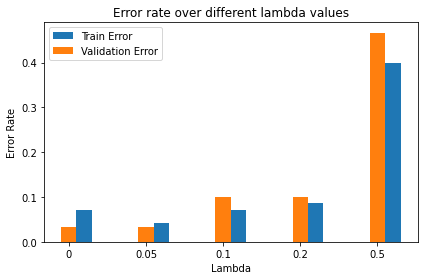

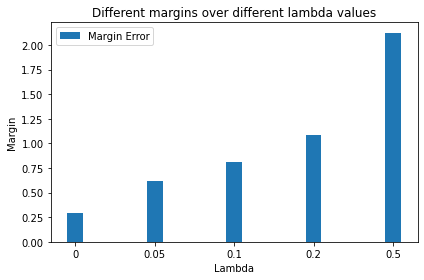

In [25]:
import numpy as np
import matplotlib.pyplot
lambdas = [0,0.05,0.1,0.2,0.5]
average_train_error = []
average_val_error = []
margins = []
for lam in lambdas:
    w,b = svm_with_sgd(X_train,y_train,lam=lam)
    average_train_error.append(calculate_error(w,b,X_train,y_train))
    average_val_error.append(calculate_error(w,b,X_val,y_val))
    margins.append(1/np.linalg.norm(w))

    
width = 0.20
fig, ax = plt.subplots()
ax.bar(x + width, average_train_error, width, label="Train Error")
ax.bar(x, average_val_error, width, label="Validation Error")
ax.set_ylabel("Error Rate")
ax.set_xlabel("Lambda")
ax.set_title("Error rate over different lambda values")
ax.set_xticks(x)
ax.set_xticklabels(lambdas)
ax.legend()
fig.tight_layout()
plt.show()


fig, ax = plt.subplots()
ax.bar(x , margins, width, label="Margin Error")
ax.set_ylabel("Margin")
ax.set_xlabel("Lambda")
ax.set_title("Different margins over different lambda values")
ax.set_xticks(x)
ax.set_xticklabels(lambdas)
ax.legend()
fig.tight_layout()
plt.show()

It would appear that the model works best with $\lambda = 0.05$.<br>
The point of cross validation is to check if out model tends to overfit or not. As the top graph shows,  the difference between the train error and the validation error is minimal (In addition to also being lower than the other models).

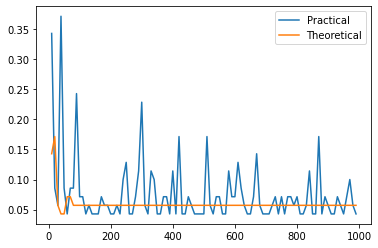

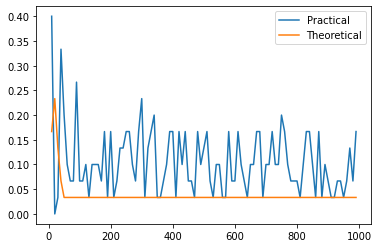

In [15]:
train_err_theo = []
train_err_pra = []
test_err_theo = []
test_err_pra = []
x = np.arange(len(lambdas))
lam = 0.05
for i in range(10,1000,10):
    w1,b1 = svm_with_sgd(X_train,y_train,lam=lam, epochs = i)
    w2,b2 = svm_with_sgd(X_train,y_train,lam=lam,sgd_type='theory', epochs = i)
    train_err_pra.append(calculate_error(w1,b1,X_train,y_train))
    train_err_theo.append(calculate_error(w2,b2,X_train,y_train))
    test_err_pra.append(calculate_error(w1,b1,X_val,y_val))
    test_err_theo.append(calculate_error(w2,b2,X_val,y_val))

plt.plot(range(10,1000,10), train_err_pra, label='Practical')
plt.plot(range(10,1000,10), train_err_theo, label='Theoretical')
plt.legend()
plt.show()
plt.plot(range(10,1000,10), test_err_pra, label='Practical')
plt.plot(range(10,1000,10), test_err_theo, label='Theoretical')
plt.legend()
plt.show()

It does not come as a surprise to see that the theoretical approach declines and remains low as we add more iterations. That is because of the upper bound we saw in the lecture describing the relation between the amound of iteration and the approximation of our model to an ideal model.<br>
We have also seen that the practical approach is close to the theoretical approach in expectation, so it also comes as not surprise to see the values as close as they are.

# Question 3

#### 3.1)


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def cross_validation_error(X, y, model, folds):
    n_sample = len(y)
    indecies = np.arange(n_sample)
    fold_sizes = np.full(folds, n_sample // folds, dtype=int)
    fold_sizes[:n_sample % folds] += 1
    current = 0
    train_err_lst = []
    test_err_lst = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indecies = indecies[start:stop]
        test_mask = np.zeros(n_sample)
        test_mask[test_indecies] = True
        train_indecies = indecies[np.logical_not(test_mask)]

        X_train = X[train_indecies]
        y_train = y[train_indecies]
        X_test = X[test_indecies]
        y_test = y[test_indecies]

        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        train_err = 1 - (np.sum(pred_train == y_train) / len(y_train))
        test_err = 1 - (np.sum(pred_test == y_test) / len(y_test))

        train_err_lst.append(train_err)
        test_err_lst.append(test_err)

        current = stop
    avg_train_err = sum(train_err_lst) / len(train_err_lst)
    avg_test_err = sum(test_err_lst) / len(test_err_lst)
    return avg_train_err, avg_test_err


#### 3.2)

In [17]:
def logistical_regression_results(X_train, y_train, X_test, y_test):
    C = [1 / 1e-4, 1 / 1e-2, 1, 1 / 1e2, 1 / 1e4]
    res = dict()
    from sklearn.linear_model import LogisticRegression
    for c in C:
        model = LogisticRegression(C=c, max_iter=10000)
        avg_train_err, avg_val_err = cross_validation_error(X_train, y_train, model, 5)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        test_err = 1 - (np.sum(pred == y_test) / len(y_test))
        res['logistic_regression_lambda_' + str(1 / c)] = (avg_train_err, avg_val_err, test_err)
    return res

#### 3.3)

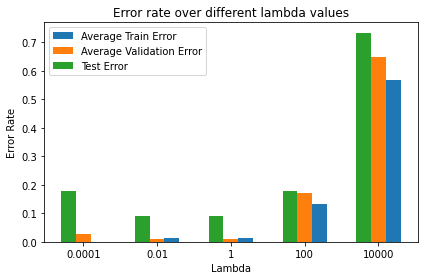

In [18]:
from sklearn.datasets import load_iris

iris_data = load_iris()
X, y = iris_data['data'], iris_data['target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
res = logistical_regression_results(X_train, y_train, X_test, y_test)
lambdas = [0.0001, 0.01, 1, 100, 10000]
x = np.arange(len(lambdas))
width = 0.20
average_train_error = []
average_val_error = []
test_error = []
for i in res.values():
    average_train_error.append(i[0])
    average_val_error.append(i[1])
    test_error.append(i[2])
fig, ax = plt.subplots()
ax.bar(x + width, average_train_error, width, label="Average Train Error")
ax.bar(x, average_val_error, width, label="Average Validation Error")
ax.bar(x - width, test_error, width, label="Test Error")
ax.set_ylabel("Error Rate")
ax.set_xlabel("Lambda")
ax.set_title("Error rate over different lambda values")
ax.set_xticks(x)
ax.set_xticklabels(lambdas)
ax.legend()
fig.tight_layout()
plt.show()

According to the CV $\lambda = 1$ is the best parameter, that is because the error rate on both the train set and the validation set is the lowest among all the parameters, also the difference between them is the lowest which indicates low overfitting, so the model produces approximatly the same results for both sets. <br>
For the test set $\lambda = 0.1$ and $\lambda = 1$ are the best parameters as they produce the lowest error rate. We can see that $\lambda = 1$ produces the overall best results, and it is not surprising to see that the model chosen by the CV is the best model overall, since it is designed to prevent overfitting and creating a biased model.